<a href="https://colab.research.google.com/github/subhamChakraborty23/Sigmoid-Neuron/blob/master/SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting Sigmoid Function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors
import pandas as pd

$S_{w, b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

In [ ]:
def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x + b)))

In [ ]:
sigmoid(1, 0.5, 0)

0.6224593312018546

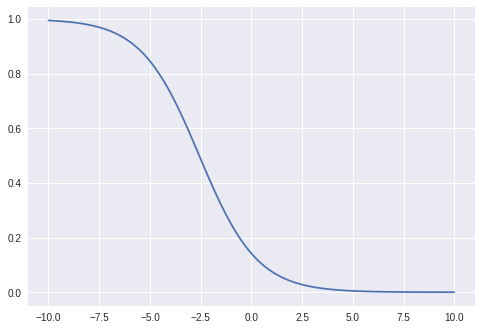

In [ ]:
w = -0.7    #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = -1.8  #@param {type: "slider", min: -2, max: 2, step: 0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()


$S_{w_1, w_2, b}(x_1, x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$

In [ ]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [ ]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [ ]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [ ]:
w1 = 2
w2 = -0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

In [ ]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

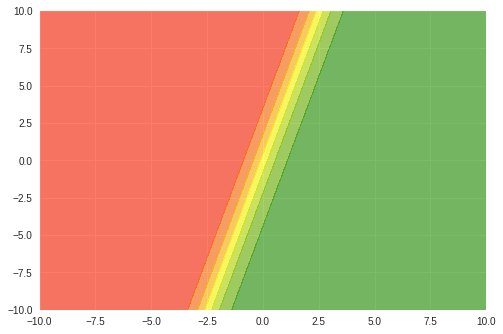

In [ ]:
plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()

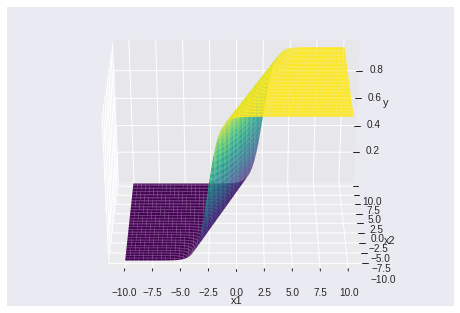

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 270)


# Compute Loss for a Given Dataset

In [ ]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

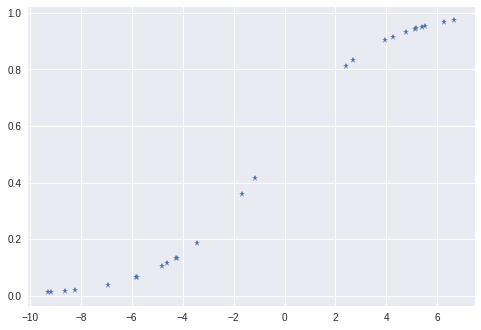

In [ ]:
plt.plot(X, Y, '*')
plt.show()

In [ ]:
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est))**2
  return loss

In [ ]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [ ]:
WW.shape

(101, 101)

In [ ]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

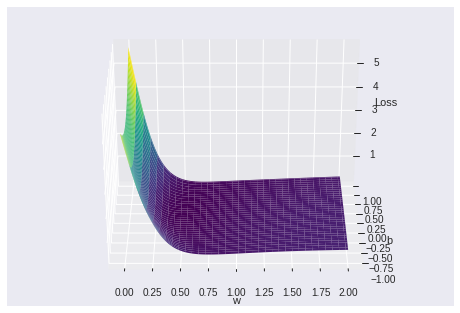

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30, 270)

In [ ]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

In [ ]:
print(i, j)

62 25


In [ ]:
print(WW[i, j], BB[i, j])

0.5 0.24


# Class for Sigmoid Neuron

In [ ]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
    
    for i in range(epochs):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db

# Fit for toy data

In [ ]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [ ]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

In [ ]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
  ax.scatter(X[:,0], X[:,1],c=Y, cmap=my_cmap)
  ax.plot()

[[ 1.51785384 -1.32744739]] [0.00151436]
[[ 1.70752417 -1.06124609]] [0.00841537]
[[ 1.88261267 -0.74045502]] [-0.05417562]
[[ 1.9411233  -0.65054195]] [-0.09142068]
[[ 1.96031176 -0.6615325 ]] [-0.12248608]
[[ 1.97981187 -0.66766108]] [-0.15154827]
[[ 1.99821195 -0.67354966]] [-0.1788731]
[[ 2.01565138 -0.67913388]] [-0.20463453]
[[ 2.032223   -0.68444049]] [-0.22898403]
[[ 2.04800696 -0.6894946 ]] [-0.25205335]
[[ 2.06307324 -0.6943183 ]] [-0.27395762]
[[ 2.07748329 -0.69893107]] [-0.29479789]
[[ 2.09129128 -0.70335013]] [-0.31466329]
[[ 2.10454518 -0.70759075]] [-0.33363271]
[[ 2.11728763 -0.71166655]] [-0.35177628]
[[ 2.1295567  -0.71558969]] [-0.36915659]
[[ 2.14138648 -0.7193711 ]] [-0.38582965]
[[ 2.15280758 -0.7230206 ]] [-0.4018458]
[[ 2.16384764 -0.72654706]] [-0.41725042]
[[ 2.17453162 -0.72995851]] [-0.4320845]
[[ 2.18488217 -0.73326225]] [-0.44638524]
[[ 2.19491989 -0.73646492]] [-0.46018643]
[[ 2.20466357 -0.73957256]] [-0.47351889]
[[ 2.21413038 -0.74259073]] [-0.4864107

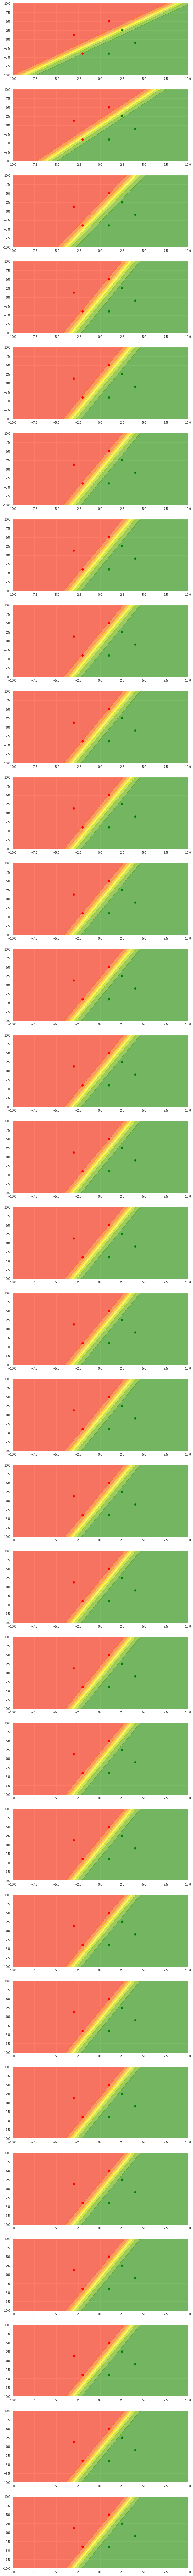

In [ ]:
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)